In [ ]:
%pip install 

In [165]:
import os, glob

dataset_path = 'data/data_split'
dataset_map = {}

for file in glob.glob(f'{dataset_path}/*.png'):
    label = file.split('\\')[-1].split('_')[0]
    if label not in dataset_map:
        dataset_map[label] = []

    dataset_map[label].append(file)

# split the dataset
train_dataset = []
test_dataset = []

# use all as train dataset and test dataset
for label in dataset_map:
    train_dataset += dataset_map[label]
    test_dataset += dataset_map[label]

print(len(train_dataset), len(test_dataset))

# shuffle the dataset
import random

random.shuffle(train_dataset)
random.shuffle(test_dataset)

576 576


In [ ]:
%pip install opencv-python scikit-learn

(576, 50, 50, 3) (576, 1)


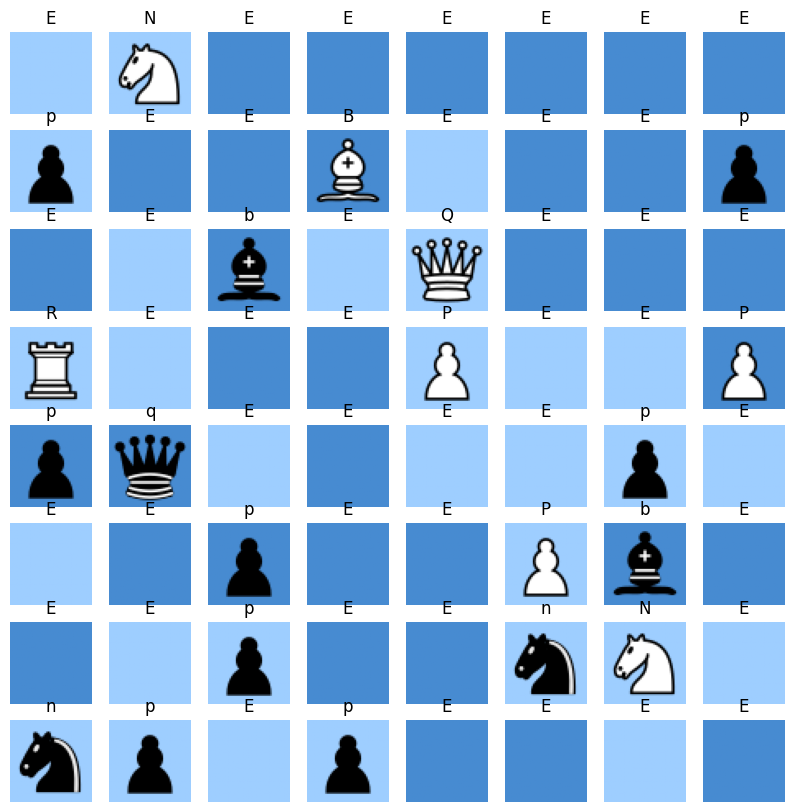

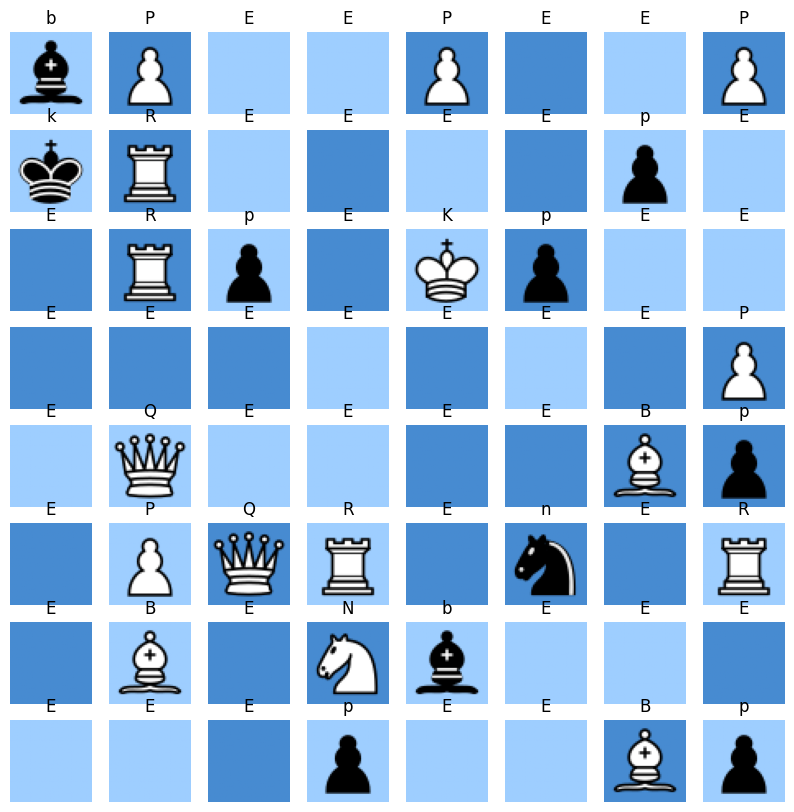

In [168]:
# preprocess the dataset
import cv2
import numpy as np

label_list = []

def preprocess_dataset(dataset):
    X = []
    y = []

    for file in dataset:
        height, width = 50, 50
        image = cv2.imread(file)
        image = cv2.resize(image, (height, width))
        # divide by 255 to normalize the data
        image = image / 255.0
        
        X.append(image)

        label = file.split('\\')[-1].split('_')[0]
        if label not in label_list:
            label_list.append(label)
        y.append([label_list.index(label)])

    return np.array(X), np.array(y)

X_train, y_train = preprocess_dataset(train_dataset)
X_test, y_test = preprocess_dataset(test_dataset)

print(X_train.shape, y_train.shape)

# show 8x8 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 8, figsize=(10, 10))

for i in range(8):
    for j in range(8):
        ax[i, j].imshow(X_train[i * 8 + j])
        ax[i, j].axis('off')
        ax[i, j].set_title(label_list[y_train[i * 8 + j][0]])

# show for test

fig, ax = plt.subplots(8, 8, figsize=(10, 10))

for i in range(8):
    for j in range(8):
        ax[i, j].imshow(X_test[i * 8 + j])
        ax[i, j].axis('off')
        ax[i, j].set_title(label_list[y_test[i * 8 + j][0]])

In [170]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

print("Class:", label_list)

model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(25, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_list), activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

# save model
model.save('model.h5')

Class: ['E', 'N', 'p', 'B', 'b', 'Q', 'R', 'P', 'q', 'n', 'k', 'K', 'r']
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 48, 48, 50)        1400      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 16, 16, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_99 (Conv2D)          (None, 12, 12, 25)        31275     
                                                                 
 flatten_28 (Flatten)        (None, 3600)              0         
                                                                 
 dropout_18 (Dropout)        (None, 3600)              0         
                                                                 
 dense_74 (Dense)            (None, 13)       

c:\App\anaconda3\envs\chess\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
